# Bayesian Multiple Regression

The data above is taken from the multiple regression tutorial from Trinity open stats lab https://sites.trinity.edu/osl/data-sets-and-activities/regression-activities, for the original article from Atir, S., Rosenzweig, E., & Dunning, D. (2015). When knowledge knows no bounds: Self-perceived expertise predicts claims of impossible knowledge. Psychological Science, 26, 1295-1303.

## Study Description

The background basis of the data analysed below, is that experts play an ever increasing role in a ever increasing complex society with focused specialisation of said experts. A supposed phenomenen is that experts may be over convinced of their capabilities and no more than they actually do and are vulnerable to illsuionary thoughts. All resulting in overclaiming.(e.g. claiming impossible things.

Atir, Rosenzweig and Dunning (2015) study took 202 people and exposed them to a overclaiming task. Partipants completed a overclaiming task and self percieved knowledge questionaire.

# Import relevant Python libraries for analysis below

In [15]:
import numpy as np 
import pandas as pd
import pystan as ps
import os
import patsy as pt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import arviz as az

In [2]:
#Change working directory to where data is dowloaded and save in local machine.
os.chdir(r"C:\Users\harri\OneDrive\Documents\Repositories\Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists\Data")

#Read in csv of the data from Atir, S., Rosenzweig, E., & Dunning, D. (2015).
df = pd.read_csv("Atir Rosenzweig Dunning 2015 Study 1b.csv")

df.head()

,id,order_of_tasks,self_perceived_knowledge,overclaiming_proportion,accuracy,FINRA_score
0,1,1,5.5,0.444444,0.250000,4
1,7,1,4.5,0.555556,0.194444,4
2,10,1,3.5,0.166667,0.347222,5
3,12,1,6.0,0.722222,-0.055556,4
4,14,1,2.5,0.388889,0.166667,3


In [3]:
# Extract the columns of the predictor (IV's) varaibles for passing to Stan Model below,
predictors = df[["self_perceived_knowledge", "accuracy"]]

# Convert predcitors in array format(matric format) to be used in the stan matrix 
# specified in the stan code below.
predictors.values;


# Plots for Exploratory Data analysis

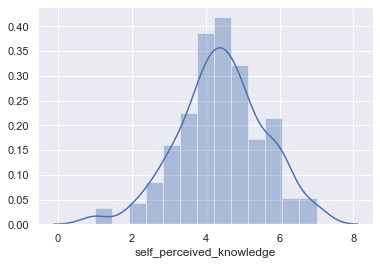

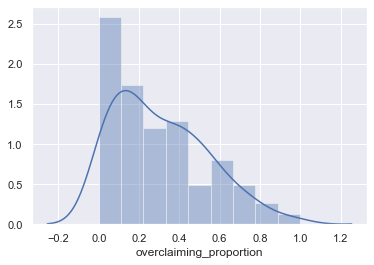

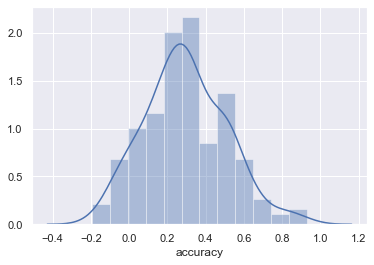

In [35]:
# Histograms
# Self percieved knowledge
sns.distplot(df["self_perceived_knowledge"])
plt.show()

sns.distplot(df["overclaiming_proportion"])
plt.show()

sns.distplot(df["accuracy"])
plt.show()

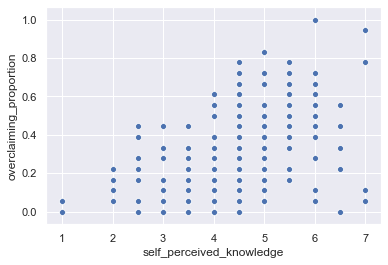

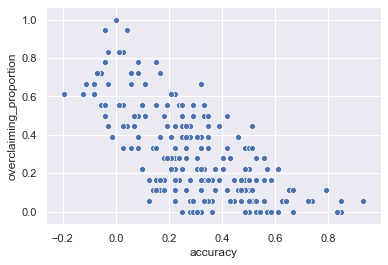

In [32]:
# Scatteplots
sns.scatterplot(x = "self_perceived_knowledge" , y = "overclaiming_proportion" , data=df)
plot_1.set(xlabel='Self Percieved Knowledge', ylabel='Overclaiming')
plt.show()

sns.scatterplot(x = "accuracy" , y = "overclaiming_proportion" , data=df)
plot_1.set(xlabel='Accuracy', ylabel='Overclaiming')
plt.show()


In [ ]:
# Stan model for conducting multiple regression

Multiple_Regression = """
data {
  int<lower=0> N;   // Sample size
  int<lower=0> K;   // Number of predictor variables
  matrix[N, K] x;   // Predictor variable (IV) matrix
  vector[N] y;      // Vector of Dependent variable (DV) values
}
parameters {
  real alpha;           // Intercept term
  vector[K] beta;       // Coefficients for predictors
  real<lower=0> sigma;  // Standard deviation
}
model {

 beta[1] ~ normal(0,1); // Priors

  y ~ normal(alpha + x * beta, sigma);  // likelihood
}
"""

In [52]:
#Code below compiled the Stan mdoel specified above.
sm = ps.StanModel(model_code = Multiple_Regression)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19b21a8d2cf3dbec8016acd7119608ed NOW.


In [6]:
# Generating a python dictionary for passing to the stan model specifiesd above.
data = {
    # Sepcifies te number of data points.
    'N': len(df),  
    # Takes te number of columns in the array (matrix) of the predcitor values generated above.
        'K': predictors.shape[1],
    # Specifies the predcitor (IV) values for use in the Stan model above.
        'x': predictors,
    # Dv values for the regression model 
        'y': df["overclaiming_proportion"]
}


# Fit Stan model

In [53]:
#Fiting model to the complied stan model above with 4 chains 
fit = sm.sampling(data= data, iter=2000, chains=4 ,seed= 302675)

In [54]:
print(fit)

Inference for Stan model: anon_model_19b21a8d2cf3dbec8016acd7119608ed.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha     0.09  8.5e-4   0.04   0.02   0.06   0.09   0.11   0.16   1871    1.0
beta[1]    0.1  1.7e-4 7.6e-3   0.08   0.09    0.1    0.1   0.11   2018    1.0
beta[2]  -0.75  8.4e-4   0.04  -0.84  -0.78  -0.75  -0.72  -0.67   2604    1.0
sigma     0.13  1.2e-4 6.4e-3   0.12   0.12   0.13   0.13   0.14   2985    1.0
lp__     313.6    0.04   1.43 309.96 312.91 313.91 314.67 315.37   1488    1.0

Samples were drawn using NUTS at Sun Nov 22 17:20:24 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [45]:
#Extract the generated samples
samples = fit.extract(permuted = True)


# Plot the posteriors of the estiamted parameters from the multiple regression model fit above.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000201DD805688>,
      dtype=object)

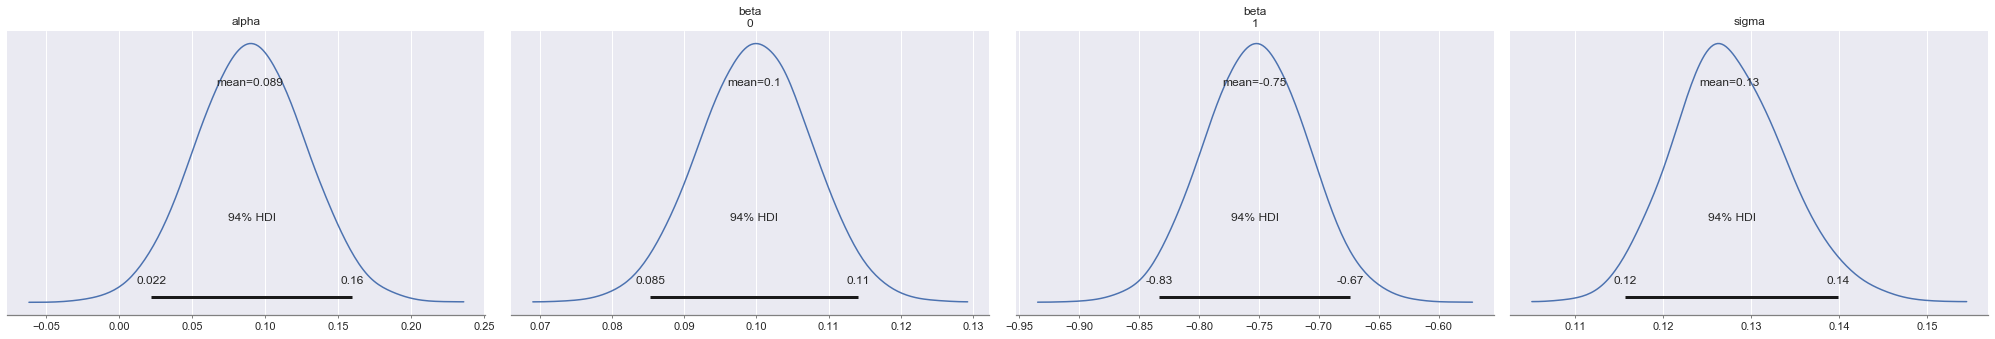

In [50]:
az.plot_posterior(fit)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000201D91E0E08>],
      dtype=object)

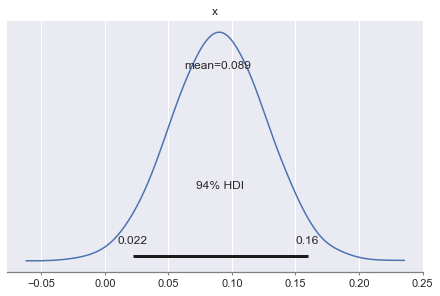

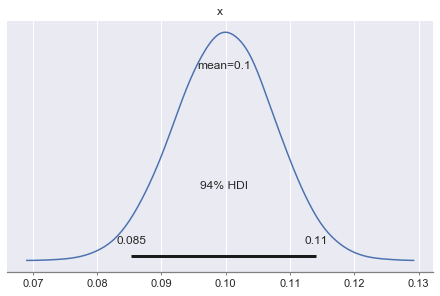

In [47]:
az.plot_posterior(fit["alpha"])
az.plot_posterior(fit["beta[1]"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000201D904CC48>],
      dtype=object)

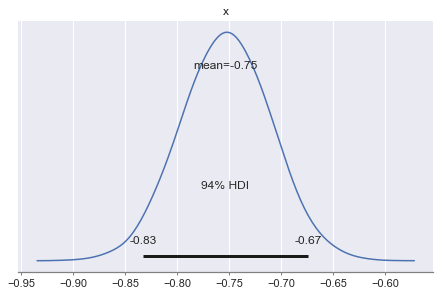

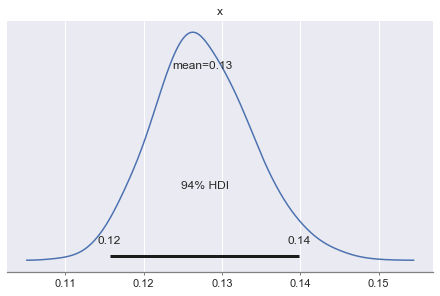

In [48]:
az.plot_posterior(fit["beta[2]"])
az.plot_posterior(fit["sigma"])                      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201DAC2C2C8>,
      dtype=object)

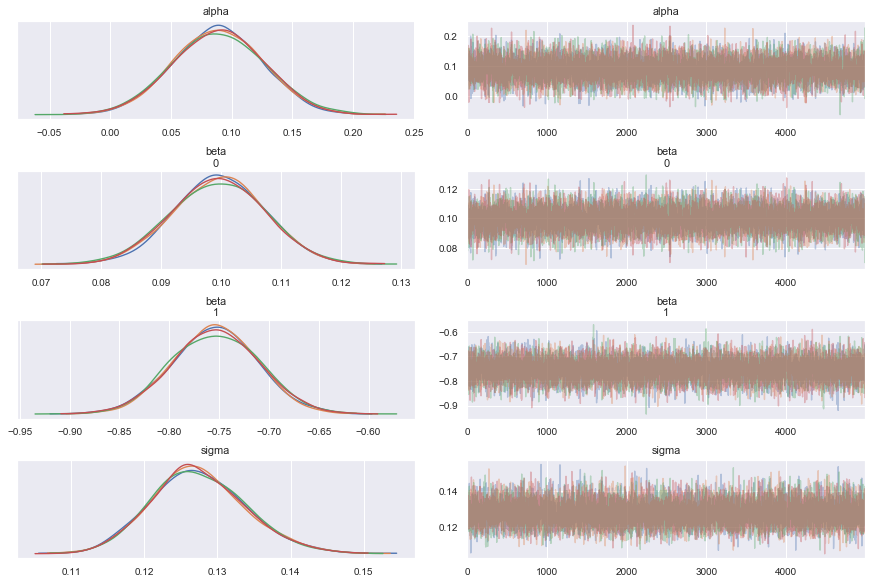

In [49]:
az.plot_trace(fit)

# Citations:

Atir, S., Rosenzweig, E., & Dunning, D. (2015). When knowledge knows no bounds: Self-perceived expertise predicts claims of impossible knowledge. Psychological Science, 26, 1295-1303.